165.59853415686283
12.89547398139175
Best sigma is: 5.0


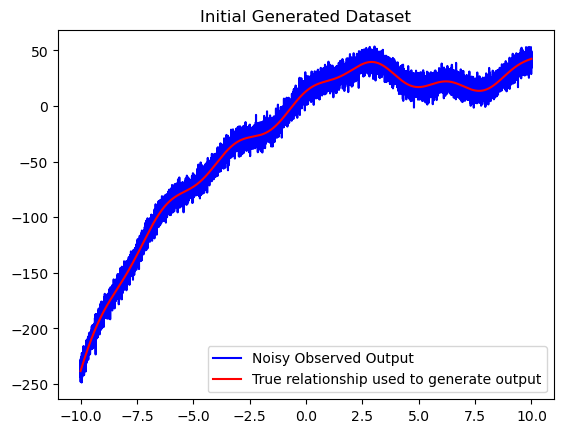

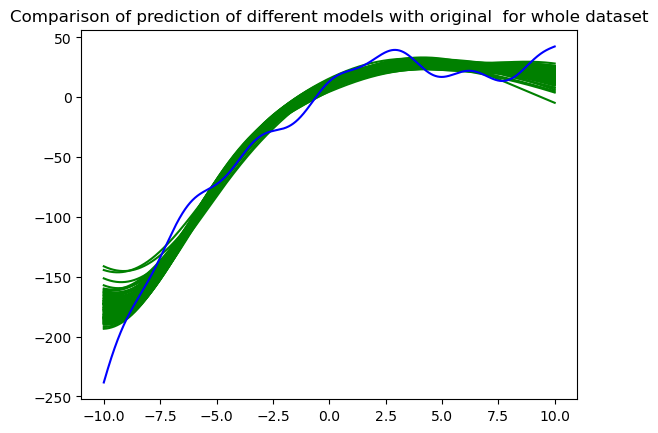

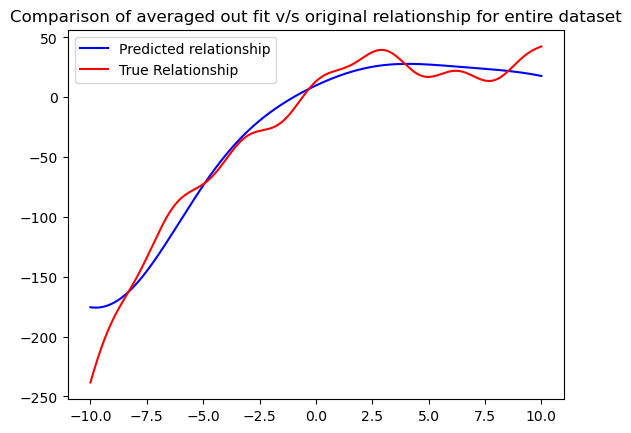

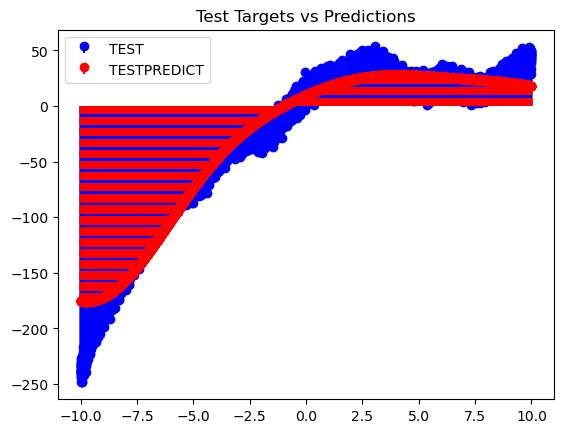

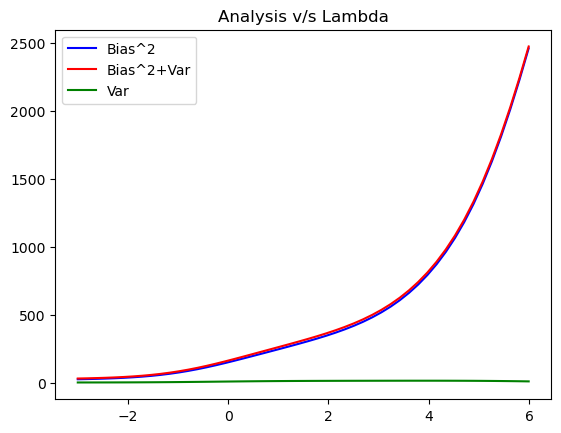

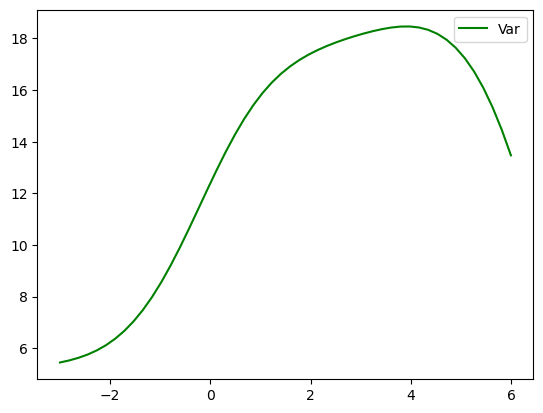

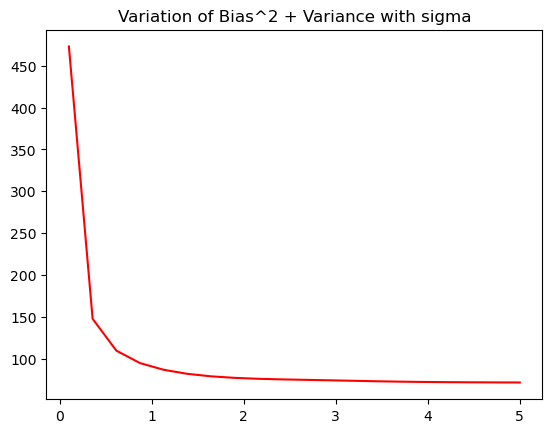

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#np.random.seed(0)
#Defining a complex relation to attempt to model
def true_function(x):
        poly = 0.1 * x**3 - x**2 + 5 * x
        trig = 10 * np.sin(0.5 * x) + 5 * np.cos(2 * x)
        gauss = 20 * np.exp(-0.5 * ((x - 2)/1.5)**2)
        return poly + trig + gauss
    
#Data Generation
x=np.arange(-10,10,0.001)
y=true_function(x)
t= y + np.random.randn(20000)* 5

#Plotting Initial Dataset
plt.figure(1)
plt.plot(x,t,'b-')
plt.plot(x,y,'r-')
plt.title("Initial Generated Dataset")
plt.legend(['Noisy Observed Output', 'True relationship used to generate output'])
plt.savefig("figure 1_Regu.png")
#Spiltting Train and Test 
indices1=np.random.permutation(20000)
x_train=x[indices1[0:10000]]
t_train=t[indices1[0:10000]]
x_test=x[indices1[10000:]]
t_test=t[indices1[10000:]]


#Splitting into 100 datasets for applying regularization models:
indices2=np.random.permutation(10000)
x_train_=[x_train[indices2[i*100:(i+1)*100]] for i in range(100)]
t_train_=[t_train[indices2[i*100:(i+1)*100]] for i in range(100)]

#Model Parameters and plan of attack
lamda= 1 #Regularization paramter
n=55 #No.of gaussian basis
g_c=np.arange(-10+(20/(n+1)),10,20/(n+1))
sigma=(n+1)/2

#Regularization Model Implementation for each dataset and plotting the predicted function
w_list=[]#Storing weights for comparative plots

for i in range(100):
    x_=x_train_[i]
    t_=t_train_[i]
    PHI = np.ones((100, 1))  # bias column
    for j in range(n):
        phi = np.exp(-((x_ - g_c[j])**2) / sigma)  
        phi = phi[:, None]  
        PHI = np.hstack((PHI, phi))
    I = np.eye(n+1)
    w = np.linalg.pinv((PHI.T @ PHI) + lamda*I ) @ PHI.T @ t_  #Regression with ridge regularization   
    w = w.reshape(1, -1)
    w_list.append(w)

#Comparitive Plot of each trained model on the original dataset
w_list=np.vstack(w_list)
#w_list = [row for row in w_list]
PHI = np.ones((20000, 1))
plt.figure(2)

for j in range(n):
    phi = np.exp(-((x - g_c[j])**2) / sigma)  
    phi = phi[:,None]  
    PHI = np.hstack((PHI, phi))
avg=[] #for storing the final averaged out prediction of all the models
for row in w_list:
        y_pred=PHI @ row.T
        avg.append(y_pred)
        plt.plot(x,y_pred,'g-')
plt.plot(x,y,'b-')
plt.title("Comparison of prediction of different models with original  for whole dataset")
plt.savefig("figure 2_Regu.png")

#Obtaining the final model
y_pred= np.mean(avg, axis=0)
plt.figure(3)
plt.plot(x,y_pred,'b-')
plt.plot(x,y,'r-')
plt.title("Comparison of averaged out fit v/s original relationship for entire dataset")
plt.legend(['Predicted relationship', 'True Relationship'])
plt.savefig("figure 3_Regu.png")

#Analysis of Performance on Train and Test Data
test_pred=y_pred[indices1[10000:]]
plt.figure(4)
plt.stem(x_test,t_test, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.stem(x_test,test_pred, linefmt='r--', markerfmt='ro', basefmt=' ')
plt.legend(['TEST', 'TESTPREDICT'])
plt.title("Test Targets vs Predictions")
plt.savefig("figure 4_Regu.png")

#y_train=y[indices1[1:1000]]
#y_pred_train=y_pred[indices1[1:1000]]

#Calculation of Bias^2
bias_2 = np.mean((y - y_pred)**2)

#Calculation of Variance
Var=0
for i in range(100):
     Var+= np.mean((avg[i] - y_pred)**2)
Var/=100
print(bias_2)
print(Var)

#Analysing Bias^2 and Variance v/s Lambda
ln_min = np.log(0.05)
ln_max = np.log(400)

lamda_values = np.linspace(ln_min, ln_max, 50)
Bias_2=[]
Variance=[]
Sum=[]
for p in range(len(lamda_values)):
    #Model Parameters and plan of attack
    lamda=lamda_values[p] #Regularization paramter
    n=50 #No.of gaussian basis
    g_c=np.arange(-10+(20/(n+1)),10,20/(n+1))
    sigma=(n+1)/2
    
    #Regularization Model Implementation for each dataset and plotting the predicted function
    w_list=[]#Storing weights for comparative plots
    
    for i in range(100):
        x_=x_train_[i]
        t_=t_train_[i]
        PHI = np.ones((100, 1))  # bias column
        for j in range(n):
            phi = np.exp(-((x_ - g_c[j])**2) / sigma)  
            phi = phi[:, None]  
            PHI = np.hstack((PHI, phi))
        I = np.eye(n+1)
        true_lamda = np.exp(lamda_values[p])
        w = np.linalg.pinv((PHI.T @ PHI) + true_lamda*I ) @ PHI.T @ t_  #Regression with ridge regularization   
        w = w.reshape(1, -1)
        w_list.append(w)
    
    #Comparitive Plot of each trained model on the original dataset
    w_list=np.vstack(w_list)
    #w_list = [row for row in w_list]
    PHI = np.ones((20000, 1))
    #plt.figure()
    
    for j in range(n):
        phi = np.exp(-((x - g_c[j])**2) / sigma)  
        phi = phi[:,None]  
        PHI = np.hstack((PHI, phi))
    avg=[] #for storing the final averaged out prediction of all the models
    for row in w_list:
            y_pred=PHI @ row.T
            avg.append(y_pred)
            #plt.plot(x,y_pred,'g-')
    #plt.plot(x,y,'b-')
    #plt.title("Comparison of prediction of different models with original  for whole dataset")
    
    #Obtaining the final model
    y_pred= np.mean(avg, axis=0)
    # plt.figure()
    # plt.plot(x,y_pred,'b-')
    # plt.plot(x,y,'r-')
    # plt.title("Comparison of averaged out fit v/s original relationship for entire dataset")
    # plt.legend(['Predicted relationship', 'True Relationship'])
    
    #Analysis of Performance on Train and Test Data
    test_pred=y_pred[indices1[10000:]]
    # plt.figure()
    # plt.stem(x_test,t_test, linefmt='b-', markerfmt='bo', basefmt=' ')
    # plt.stem(x_test,test_pred, linefmt='r--', markerfmt='ro', basefmt=' ')
    # plt.legend(['TEST', 'TESTPREDICT'])
    # plt.title("Test Targets vs Predictions")
    
    #y_train=y[indices1[1:1000]]
    #y_pred_train=y_pred[indices1[1:1000]]
    
    #Calculation of Bias^2
    bias_2 = np.mean((y - y_pred)**2)
    
    #Calculation of Variance
    Var=0
    for i in range(100):
         Var+= np.mean((avg[i] - y_pred)**2)
    Var/=100
    Bias_2.append(bias_2)
    Variance.append(Var)
    Sum.append(bias_2+Var)
plt.figure(5)
plt.plot(lamda_values,Bias_2,'b-')
plt.plot(lamda_values,Sum,'r-')
plt.plot(lamda_values,Variance,'g-')
plt.title("Analysis v/s Lambda")
plt.legend(['Bias^2','Bias^2+Var','Var'])
plt.savefig("figure 5_Regu.png")

plt.figure(6)
plt.plot(lamda_values,Variance,'g-')
plt.legend(['Var'])
plt.savefig("figure 6_Regu.png")

#Analysing for different sigma values
sigma_values=np.linspace(0.1,5,20)
Sum=[]
for a in sigma_values:
    #Model Parameters and plan of attack
    lamda=0.5 #Regularization paramter
    n=50 #No.of gaussian basis
    g_c=np.arange(-10+(20/(n+1)),10,20/(n+1))
    sigma=a
    
    #Regularization Model Implementation for each dataset and plotting the predicted function
    w_list=[]#Storing weights for comparative plots
    
    for i in range(100):
        x_=x_train_[i]
        t_=t_train_[i]
        PHI = np.ones((100, 1))  # bias column
        for j in range(n):
            phi = np.exp(-((x_ - g_c[j])**2) / sigma)  
            phi = phi[:, None]  
            PHI = np.hstack((PHI, phi))
        I = np.eye(n+1) 
        w = np.linalg.pinv((PHI.T @ PHI) + lamda*I ) @ PHI.T @ t_  #Regression with ridge regularization   
        w = w.reshape(1, -1)
        w_list.append(w)
    
    #Comparitive Plot of each trained model on the original dataset
    w_list=np.vstack(w_list)
    #w_list = [row for row in w_list]
    PHI = np.ones((20000, 1))
    #plt.figure()
    
    for j in range(n):
        phi = np.exp(-((x - g_c[j])**2) / sigma)  
        phi = phi[:,None]  
        PHI = np.hstack((PHI, phi))
    avg=[] #for storing the final averaged out prediction of all the models
    for row in w_list:
            y_pred=PHI @ row.T
            avg.append(y_pred)
            #plt.plot(x,y_pred,'g-')
    plt.plot(x,y,'b-')
    plt.title("Comparison of prediction of different models with original  for whole dataset")
    
    #Obtaining the final model
    y_pred= np.mean(avg, axis=0)
    plt.figure()
    plt.plot(x,y_pred,'b-')
    plt.plot(x,y,'r-')
    plt.title("Comparison of averaged out fit v/s original relationship for entire dataset")
    plt.legend(['Predicted relationship', 'True Relationship'])
    
    #Analysis of Performance on Train and Test Data
    test_pred=y_pred[indices1[10000:]]
    plt.figure()
    plt.stem(x_test,t_test, linefmt='b-', markerfmt='bo', basefmt=' ')
    plt.stem(x_test,test_pred, linefmt='r--', markerfmt='ro', basefmt=' ')
    plt.legend(['TEST', 'TESTPREDICT'])
    plt.title("Test Targets vs Predictions")
    
    
    #y_train=y[indices1[1:1000]]
    #y_pred_train=y_pred[indices1[1:1000]]
    
    #Calculation of Bias^2
    bias_2 = np.mean((y - y_pred)**2)
    
    #Calculation of Variance
    Var=0
    for i in range(100):
         Var+= np.mean((avg[i] - y_pred)**2)
    Var/=100
    Sum.append(bias_2+Var)

plt.figure(7)
plt.plot(sigma_values,Sum,'r-')
plt.title("Variation of Bias^2 + Variance with sigma")
plt.savefig("figure 7_Regu.png")
min_index = np.argmin(Sum)
best_sigma = sigma_values[min_index]
print("Best sigma is:", best_sigma)